# Libraries

In [1]:
import pandas as pd
import numpy as np

from nba_api.stats.endpoints import playbyplay
from nba_api.stats.endpoints import shotchartdetail

from nba_api.stats.static import players
from nba_api.stats.static import teams

In [2]:
df_teams = pd.DataFrame(teams.get_teams())
df_teams

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [3]:
nba_players = players.get_players()

In [4]:
df_players = pd.DataFrame(nba_players)
df_players

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False
...,...,...,...,...,...
4718,1627790,Ante Zizic,Ante,Zizic,False
4719,78647,Jim Zoet,Jim,Zoet,False
4720,78648,Bill Zopf,Bill,Zopf,False
4721,1627826,Ivica Zubac,Ivica,Zubac,True


In [5]:
df_players[df_players['full_name'] == 'Klay Thompson']

,id,full_name,first_name,last_name,is_active
4160,202691,Klay Thompson,Klay,Thompson,True


In [6]:
player_id = 202691
team_id = 1610612744
season = '2021-22'

In [49]:
df = shotchartdetail.ShotChartDetail(team_id,player_id).get_data_frames()[0]

In [50]:
df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021100005,406,202691,Klay Thompson,1610612744,Golden State Warriors,3,1,58,...,Center(C),24+ ft.,26,18,266,1,1,20111225,GSW,LAC
1,Shot Chart Detail,0021100005,466,202691,Klay Thompson,1610612744,Golden State Warriors,4,8,28,...,Center(C),Less Than 8 ft.,1,-11,7,1,1,20111225,GSW,LAC
2,Shot Chart Detail,0021100032,135,202691,Klay Thompson,1610612744,Golden State Warriors,2,11,23,...,Left Side(L),16-24 ft.,19,-163,112,1,1,20111228,GSW,NYK
3,Shot Chart Detail,0021100056,53,202691,Klay Thompson,1610612744,Golden State Warriors,1,6,12,...,Left Side Center(LC),24+ ft.,26,-210,156,1,1,20111231,GSW,PHI
4,Shot Chart Detail,0021100066,428,202691,Klay Thompson,1610612744,Golden State Warriors,4,8,52,...,Right Side Center(RC),24+ ft.,25,157,206,1,1,20120102,PHX,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,Shot Chart Detail,0022101225,506,202691,Klay Thompson,1610612744,Golden State Warriors,4,8,57,...,Center(C),Less Than 8 ft.,2,20,2,1,1,20220410,NOP,GSW
4754,Shot Chart Detail,0022101225,525,202691,Klay Thompson,1610612744,Golden State Warriors,4,7,54,...,Center(C),8-16 ft.,11,1,112,1,1,20220410,NOP,GSW
4755,Shot Chart Detail,0022101225,534,202691,Klay Thompson,1610612744,Golden State Warriors,4,7,10,...,Center(C),8-16 ft.,14,17,149,1,1,20220410,NOP,GSW
4756,Shot Chart Detail,0022101225,541,202691,Klay Thompson,1610612744,Golden State Warriors,4,6,34,...,Right Side Center(RC),24+ ft.,26,183,185,1,1,20220410,NOP,GSW


In [8]:
df.SHOT_TYPE.value_counts()

2PT Field Goal    2846
3PT Field Goal    1912
Name: SHOT_TYPE, dtype: int64

In [9]:
df3pt = df[df.SHOT_TYPE == '3PT Field Goal']

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

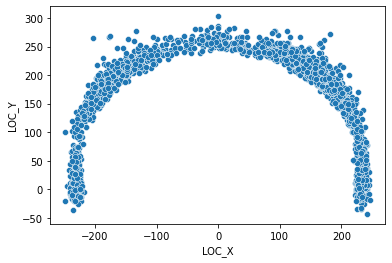

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data = df3pt, x = 'LOC_X', y='LOC_Y')

----

In [11]:
import requests
from bs4 import BeautifulSoup as bs

In [40]:
url = 'https://www.nba.com/stats/events/?flag=3&CFID=33&CFPARAMS=2021-22&PlayerID=202691&ContextMeasure=FGA&Season=2021-22&section=player&sct=plot&CF=SHOT_TYPE*E*3PT%20Field%20Goal'

In [41]:
r = requests.get(url)

In [42]:
soup = bs(r.content)

In [48]:
soup.find_all('div')

[<div class="nba-nav-placeholder" id="nba-nav"></div>,
 <div class="nav-container" ng-cloak="" ng-controller="StatsHeaderController" stats-fixed-nav="">
 <div class="nav-wrapper shadow-md">
 <div class="nav-inner">
 <!-- left: inner nav -->
 <div class="nav-inner__title">Stats</div>
 <div class="nav-inner__divider"></div>
 <nav class="nav-inner__menu" role="navigation">
 <div class="nav-inner__menu-item">
 <a class="nav-inner__btn" href="/stats/" ng-class="{ active: activeTab=='home' }">Home</a>
 </div>
 <div class="nav-inner__menu-item nav-inner__btn-players">
 <button aria-expanded="{{isPlayersOpen}}" aria-haspopup="true" class="nav-inner__btn" ng-class="{ active: activeTab=='players' }" ng-click="togglePlayers()">
             Players
             <svg class="arrow" height="7" ng-class="{ open: isPlayersOpen }" viewbox="0 0 11 7" width="11" xmlns="http://www.w3.org/2000/svg">
 <path d="M110 4L114 8 110 12" fill="none" stroke="#999" stroke-width="2" transform="rotate(90 61.25 -47.75)

---

In [54]:
df = shotchartdetail.ShotChartDetail(team_id = int(team_id),
                                     player_id = int(player_id),
                                     season_type_all_star='Regular Season',
                                     season_nullable='2021-22',
                                     context_measure_simple = 'FG3A').get_data_frames()

In [57]:
df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            296 non-null    object
 1   GAME_ID              296 non-null    object
 2   GAME_EVENT_ID        296 non-null    int64 
 3   PLAYER_ID            296 non-null    int64 
 4   PLAYER_NAME          296 non-null    object
 5   TEAM_ID              296 non-null    int64 
 6   TEAM_NAME            296 non-null    object
 7   PERIOD               296 non-null    int64 
 8   MINUTES_REMAINING    296 non-null    int64 
 9   SECONDS_REMAINING    296 non-null    int64 
 10  EVENT_TYPE           296 non-null    object
 11  ACTION_TYPE          296 non-null    object
 12  SHOT_TYPE            296 non-null    object
 13  SHOT_ZONE_BASIC      296 non-null    object
 14  SHOT_ZONE_AREA       296 non-null    object
 15  SHOT_ZONE_RANGE      296 non-null    object
 16  SHOT_DIS

In [60]:
from nba_api.stats.endpoints import leaguegamefinder

In [70]:
df_teams = leaguegamefinder.LeagueGameFinder(league_id_nullable = '00',
                                            season_nullable = '2021-22').get_data_frames()

In [73]:
df_season = df_teams[0]

In [74]:
df_season[df_season.SEASON_ID == '32021']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
880,32021,1610616833,DRT,Team Durant,0032100001,2022-02-20,DRT @ LBN,L,241,160,...,1.000,13,37,50,41,11,1,14,2,-3.0
881,32021,1610616834,LBN,Team LeBron,0032100001,2022-02-20,LBN vs. DRT,W,240,163,...,1.000,13,35,48,40,13,6,16,6,3.0
882,32021,1610616847,BAR,Team Barry,0032100006,2022-02-18,BAR @ IAH,W,5,25,...,0.750,1,9,10,9,2,3,4,3,5.0
883,32021,1610616849,IAH,Team Isiah,0032100006,2022-02-18,IAH vs. BAR,L,5,20,...,0.667,5,7,12,5,2,2,3,4,-5.0
884,32021,1610616850,WOR,Team Worthy,0032100004,2022-02-18,WOR @ IAH,L,5,49,...,0.250,5,10,15,12,3,1,5,4,-1.0
885,32021,1610616849,IAH,Team Isiah,0032100004,2022-02-18,IAH vs. WOR,W,5,50,...,1.000,5,13,18,15,5,1,4,3,1.0
886,32021,1610616839,NIQ,Team Nique,0032100003,2022-02-18,NIQ vs. WAL,L,240,51,...,0.467,12,16,28,13,18,6,12,8,-14.0
887,32021,1610616840,WAL,Team Walton,0032100003,2022-02-18,WAL @ NIQ,W,240,65,...,0.375,29,34,63,13,7,7,24,13,14.0
888,32021,1610616848,PAY,Team Payton,0032100005,2022-02-18,PAY @ BAR,L,5,48,...,0.500,5,8,13,8,5,1,3,7,-2.0
889,32021,1610616847,BAR,Team Barry,0032100005,2022-02-18,BAR vs. PAY,W,5,50,...,0.556,9,16,25,10,2,5,9,3,2.0


In [82]:
df_season[df_season.SEASON_ID == '22021'].sort_values(by='GAME_DATE')

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
2655,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,...,0.833,9,41,50,30,9,2,17,18,7.0
2652,22021,1610612751,BKN,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,241,104,...,0.565,5,39,44,19,3,9,12,17,-23.0
2654,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,241,114,...,0.474,5,40,45,21,7,4,17,25,-7.0
2653,22021,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,239,127,...,0.778,13,41,54,25,8,9,7,19,23.0
2630,22021,1610612754,IND,Indiana Pacers,0022100003,2021-10-20,IND @ CHA,L,240,122,...,0.875,8,43,51,29,2,10,16,24,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,22021,1610612748,MIA,Miami Heat,0022101227,2022-04-10,MIA @ ORL,L,239,111,...,0.750,10,37,47,20,5,4,10,13,-14.0
214,22021,1610612761,TOR,Toronto Raptors,0022101226,2022-04-10,TOR @ NYK,L,240,94,...,0.909,9,34,43,27,10,2,13,17,-11.0
215,22021,1610612752,NYK,New York Knicks,0022101226,2022-04-10,NYK vs. TOR,W,241,105,...,0.833,10,38,48,32,6,5,15,17,11.0
201,22021,1610612749,MIL,Milwaukee Bucks,0022101218,2022-04-10,MIL @ CLE,L,240,115,...,0.781,8,33,41,27,7,2,12,14,-18.0


In [58]:
df[0].SHOT_DISTANCE

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100604,20,202691,Klay Thompson,1610612744,Golden State Warriors,1,11,1,...,Left Side Center(LC),24+ ft.,27,-105,249,1,0,20220109,GSW,CLE
1,Shot Chart Detail,0022100604,37,202691,Klay Thompson,1610612744,Golden State Warriors,1,9,19,...,Left Side(L),24+ ft.,23,-232,-4,1,0,20220109,GSW,CLE
2,Shot Chart Detail,0022100604,49,202691,Klay Thompson,1610612744,Golden State Warriors,1,8,4,...,Right Side Center(RC),24+ ft.,25,126,222,1,0,20220109,GSW,CLE
3,Shot Chart Detail,0022100604,314,202691,Klay Thompson,1610612744,Golden State Warriors,2,1,18,...,Left Side Center(LC),24+ ft.,26,-167,210,1,1,20220109,GSW,CLE
4,Shot Chart Detail,0022100604,356,202691,Klay Thompson,1610612744,Golden State Warriors,3,9,10,...,Right Side Center(RC),24+ ft.,29,197,218,1,1,20220109,GSW,CLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Shot Chart Detail,0022101225,348,202691,Klay Thompson,1610612744,Golden State Warriors,3,9,17,...,Left Side Center(LC),24+ ft.,26,-162,205,1,1,20220410,NOP,GSW
292,Shot Chart Detail,0022101225,381,202691,Klay Thompson,1610612744,Golden State Warriors,3,6,32,...,Left Side Center(LC),24+ ft.,27,-221,159,1,0,20220410,NOP,GSW
293,Shot Chart Detail,0022101225,537,202691,Klay Thompson,1610612744,Golden State Warriors,4,6,45,...,Right Side Center(RC),24+ ft.,24,154,194,1,0,20220410,NOP,GSW
294,Shot Chart Detail,0022101225,541,202691,Klay Thompson,1610612744,Golden State Warriors,4,6,34,...,Right Side Center(RC),24+ ft.,26,183,185,1,1,20220410,NOP,GSW


# Play by Play 

Can estimate shot clock time by analyzizng changes in the clock